# Estudio descriptivo con SQR

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Cargamos las librerías necesarias
from sklearn import preprocessing
from statistics import mode
import gower
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/dslab/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
os.chdir('..')

In [4]:
pd.options.display.max_rows = 180

In [5]:
# Cargamos datos con SQR
perfiles_sqr = pd.read_parquet('data/processed/perfiles_sqr_filtrado.parquet')
perfiles_sqr.reset_index(drop=True, inplace=True) # reseteamos el índice

### SQR en sexo

In [6]:
perfiles_sqr.groupby('sexo').agg({'sqr': [min, max, 'mean', 'std', 'size'],})


sqr                                    
             min      max       mean        std size
sexo                                                
Female  0.093528  97.0198  31.935421  17.525474  303
Male    0.039927  98.9901  34.335482  18.758541  364

### SQR en posición

In [7]:
perfiles_sqr.groupby('posicion').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                    
               min      max       mean        std size
posicion                                              
Lateral   0.039927  98.9901  32.275680  17.421881  456
Supine    0.132861  97.6852  35.340464  19.758723  211

### SQR en altura dependiendo del sexo

In [8]:
# Categorizamos altura para hombre y mujer
perfiles_sqr["altura_cat_hombre"] = pd.cut(perfiles_sqr['altura'], bins=[0, 160, 170, 185, 250], include_lowest=True,
       labels=['<1.6', '1.6-1.7', '1.7-1.85', '>1.85'])
perfiles_sqr["altura_cat_mujer"] = pd.cut(perfiles_sqr['altura'], bins=[0, 150, 160, 170, 250], include_lowest=True,
       labels=['<1.50', '1.5-1.6', '1.6-1.7', '>1.7'])

#### Hombres

In [9]:
perfiles_sqr[perfiles_sqr['sexo']=="Male"].groupby('altura_cat_hombre').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                    
                         min      max       mean        std size
altura_cat_hombre                                               
<1.6               14.362300  56.9062  36.462300  12.839455    9
1.6-1.7             0.039927  98.9901  33.592818  20.757670   58
1.7-1.85            0.132861  98.1634  33.555040  18.407528  264
>1.85              11.718400  97.6697  41.304267  18.459575   33

#### Mujeres

In [10]:
perfiles_sqr[perfiles_sqr['sexo']=="Female"].groupby('altura_cat_mujer').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                    
                        min      max       mean        std size
altura_cat_mujer                                               
<1.50             19.536300  51.3709  33.921712  12.155514    8
1.5-1.6            0.957338  73.0798  31.368161  16.325843   92
1.6-1.7            0.093528  97.0198  32.315135  17.980602  162
>1.7               1.352010  76.6299  31.320396  19.568137   41

### SQR en peso dependiendo del sexo

In [11]:
# Categorizamos peso para hombre y mujer
perfiles_sqr["peso_cat_hombre"] = pd.cut(perfiles_sqr['peso'], bins=[0, 60, 75, 90, 250], include_lowest=True,
       labels=['<60', '60-75', '75-90', '>90'])
perfiles_sqr["peso_cat_mujer"] = pd.cut(perfiles_sqr['peso'], bins=[0, 50, 65, 80, 250], include_lowest=True,
       labels=['<50', '50-65', '65-80', '>80'])

#### Hombres

In [12]:
perfiles_sqr[perfiles_sqr['sexo']=="Male"].groupby('peso_cat_hombre').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                    
                       min      max       mean        std size
peso_cat_hombre                                               
<60              13.822100  46.0235  25.086400  13.184555    5
60-75             0.039927  98.9901  32.843877  19.927983   85
75-90             0.624949  98.1634  34.694258  19.093157  156
>90               0.132861  97.6697  35.327539  17.643573  118

#### Mujeres

In [13]:
perfiles_sqr[perfiles_sqr['sexo']=="Female"].groupby('peso_cat_mujer').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                    
                      min      max       mean        std size
peso_cat_mujer                                               
<50             13.264600  56.1226  31.834579  13.259204   19
50-65            0.093528  73.0798  28.972477  16.757007  148
65-80            2.207280  83.7040  35.262348  17.072420   99
>80              1.352010  97.0198  34.937204  21.745213   37

## Ejemplos

In [14]:
cat_bigmen = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"] == "Supine") 
                               & (perfiles_sqr["altura"]>=180) & (perfiles_sqr["peso"] >= 80)]
cat_smallwomen = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"] == "Lateral")
                                   & (perfiles_sqr["altura"]<=160) & (perfiles_sqr["peso"] <= 60)]
# Cambiamos la posicion
cat_bigmen2 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"] == "Lateral") 
                               & (perfiles_sqr["altura"]>=180) & (perfiles_sqr["peso"] >= 80)]
cat_smallwomen2 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"] == "Supine")
                                   & (perfiles_sqr["altura"]<=160) & (perfiles_sqr["peso"] <= 60)]

In [15]:
# Hombres grandes Supine
cat_bigmen['sqr'].describe()

count    50.000000
mean     35.668762
std      20.594726
min       0.624949
25%      22.958500
50%      30.469150
75%      40.125200
max      97.685200
Name: sqr, dtype: float64

In [16]:
# Hombres grandes Lateral
cat_bigmen2['sqr'].describe()

count    77.000000
mean     34.757574
std      15.158779
min       0.546476
25%      24.619900
50%      33.276000
75%      43.184000
max      76.971000
Name: sqr, dtype: float64

In [17]:
# Mujeres pequeñas Supine
cat_smallwomen['sqr'].describe()

count    45.000000
mean     26.975716
std      13.893197
min       2.196300
25%      19.508300
50%      25.259200
75%      32.304000
max      56.668100
Name: sqr, dtype: float64

In [18]:
# Mujeres pequeñas Lateral
cat_smallwomen2['sqr'].describe()

count    14.000000
mean     34.286717
std      20.089276
min       0.957338
25%      18.470125
50%      31.679300
75%      48.853800
max      71.569700
Name: sqr, dtype: float64

# Estudio profundo del SQR en todas las categorias

#### Individuos con SQR>65

In [19]:
df_sqr65 = perfiles_sqr[perfiles_sqr["sqr"]>65]
df_sqr65.groupby(["sexo","posicion"]).size()
df_sqr65.groupby(["sexo","posicion","presiones"]).size()

sexo    posicion  presiones   
Female  Lateral   002223211222    1
                  002233211222    2
                  003332112222    1
                  003333212222    1
                  113334322232    1
                  221122111122    1
        Supine    112222122222    1
                  112222222222    1
                  112222322222    1
                  112223222222    2
                  112233222222    1
                  222234322332    1
                  442222222222    1
Male    Lateral   000011102222    1
                  002223211222    1
                  002223321222    2
                  002233211222    1
                  002233212222    1
                  112223321222    1
                  112233332223    1
                  223333432223    1
                  223334322332    1
                  332223222232    1
                  442255222222    1
        Supine    004422332222    1
                  112222222222    1
                  112222322222   

#### Individuos con SQR>50

In [20]:
df_sqr50 = perfiles_sqr[perfiles_sqr["sqr"]>50]
df_sqr50.groupby(["sexo","posicion","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})

sqr                                    
                                  min      max       mean        std size
sexo   posicion presiones                                                
Female Lateral  000000002222  55.6619  55.6619  55.661900        NaN    1
                000000002232  62.5787  62.5787  62.578700        NaN    1
                000000012222  53.0161  53.0161  53.016100        NaN    1
                001122111222  56.1226  57.2341  56.678350   0.785949    2
                001122211222  63.1079  63.1079  63.107900        NaN    1
                002221112222  54.6189  56.6681  55.643500   1.449003    2
                002222112222  53.3149  53.3149  53.314900        NaN    1
                002223211222  55.7415  83.7040  69.722750  19.772473    2
                002232112222  51.3709  56.6593  54.015100   3.739464    2
                002233211222  59.1602  67.4817  64.069700   4.358179    3
                003332112222  61.3636  69.0573  65.210450   5.440267    2
                003332122222  52.2570  52.4039  52.330450   0.103874    2
                003333212222  53.7830  76.6299  65.206450  16.155198    2
                110011111222  61.1938  61.1938  61.193800        NaN    1
                110022211222  50.0301  50.0301  50.030100        NaN    1
                111122211222  50.3071  50.3071  50.307100        NaN    1
                111123211222  54.9162  54.9162  54.916200        NaN    1
                113334322232  73.2718  73.2718  73.271800        NaN    1
                221122111122  74.6874  74.6874  74.687400        NaN    1
                223345322342  55.3782  55.3782  55.378200        NaN    1
       Supine   112222122222  55.6449  71.5697  61.432367   8.808565    3
                112222212222  63.5120  63.5120  63.512000        NaN    1
                112222222222  53.5324  73.0798  60.360600  11.025113    3
                112222322222  69.3526  69.3526  69.352600        NaN    1
                112223222222  51.7138  73.5741  58.878700   8.795611    6
                112232222222  55.7516  55.7516  55.751600        NaN    1
                112233222222  75.8207  75.8207  75.820700        NaN    1
                222234322332  97.0198  97.0198  97.019800        NaN    1
                333355412222  58.0889  58.0889  58.088900        NaN    1
                442222222222  71.0033  71.0033  71.003300        NaN    1
Male   Lateral  000000002222  64.5686  64.5686  64.568600        NaN    1
                000011102222  98.9901  98.9901  98.990100        NaN    1
                000033331222  63.2326  63.2326  63.232600        NaN    1
                001111221222  58.0803  58.0803  58.080300        NaN    1
                001122212232  58.1167  58.1167  58.116700        NaN    1
                002223211222  58.5529  66.5363  62.544600   5.645116    2
                002223321222  56.3419  86.4615  71.722775  14.545282    4
                002233211222  98.1634  98.1634  98.163400        NaN    1
                002233212222  50.1214  72.3625  61.241950  15.726833    2
                002233222223  54.7396  54.7396  54.739600        NaN    1
                002233222232  56.6526  56.6526  56.652600        NaN    1
                002233322222  52.1645  63.9379  58.363200   5.911452    3
                112223321222  56.4177  84.2276  70.322650  19.664569    2
                112223322223  55.2295  55.2295  55.229500        NaN    1
                112233312232  52.6434  63.5067  58.075050   7.681513    2
                112233331223  51.8739  57.0299  54.451900   3.645843    2
                112233332223  53.2487  65.8339  59.541300   8.899080    2
                223333432223  50.9734  76.9710  64.204733  13.005038    3
                223333432233  51.4763  51.4763  51.476300        NaN    1
                223334322232  58.6938  58.6938  58.693800        NaN    1
                223334322332  65.4151  65.4151  65.415100        NaN    1
                223334432233  53.4759 

#### Individuos con SQR<40

In [21]:
df_sqr40 = perfiles_sqr[perfiles_sqr["sqr"]<40]
df_sqr40.groupby(["sexo","posicion","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})

sqr                                      
                                    min        max       mean        std size
sexo   posicion presiones                                                    
Female Lateral  000000001122  33.909100  33.909100  33.909100        NaN    1
                000000001222  11.081000  26.112400  19.766967   7.784235    3
                000000002222  20.326700  24.753200  22.539950   3.130008    2
                000013102222  20.629100  20.629100  20.629100        NaN    1
                001110002222  19.152300  19.152300  19.152300        NaN    1
                001111002222  15.086300  15.086300  15.086300        NaN    1
                001122111222  17.200300  36.762100  23.928514   7.210162    7
                001122112222   2.448560  17.790500  11.073187   7.846793    3
                001122211222   0.093528  35.096400  23.109696  10.334882   17
                001122212222  19.574700  19.574700  19.574700        NaN    1
                001122221122  14.750100  14.750100  14.750100        NaN    1
                001123112222  16.944800  19.827000  18.385900   2.038023    2
                001123212222  12.778600  12.778600  12.778600        NaN    1
                001155412222  15.509000  15.509000  15.509000        NaN    1
                002221102222  23.485200  23.485200  23.485200        NaN    1
                002221112222   6.668730  35.632200  24.749163   7.847524   10
                002221122222  19.748700  32.304000  26.026350   8.877938    2
                002222112222   5.260960  32.160900  20.379684  10.282359    8
                002222122222   1.119980   1.119980   1.119980        NaN    1
                002223112222  22.404500  22.404500  22.404500        NaN    1
                002223211222  11.919200  30.660800  22.120400   9.480537    3
                002223212222   9.938750   9.938750   9.938750        NaN    1
                002223321222  20.062100  20.062100  20.062100        NaN    1
                002231112222  13.264600  33.476400  21.749700  10.488574    3
                002231122222  17.795400  30.281400  24.038400   8.828935    2
                002232112222  17.101800  33.118700  26.405640   6.976554    5
                002233211222  11.195800  35.466700  24.246058   8.082448   12
                002233212222  25.465700  25.465700  25.465700        NaN    1
                002233321122  24.070200  24.070200  24.070200        NaN    1
                002234212222  20.567000  20.567000  20.567000        NaN    1
                003332112222  20.225200  32.921900  27.788880   5.119542    5
                003333212222   1.971650  34.036800  20.283658  10.370611    6
                005510212232  31.272400  31.272400  31.272400        NaN    1
                110000112222  29.855600  29.855600  29.855600        NaN    1
                111111002222  19.651700  19.651700  19.651700        NaN    1
                111122211222  10.871000  32.609700  21.666033  10.870112    3
                111122212222   9.450090  35.319600  24.083332   8.689952    6
                111122321222  16.395100  16.395100  16.395100        NaN    1
                111123211222   2.987920  15.764300  10.157607   6.530022    3
                111123212222  31.588800  31.588800  31.588800        NaN    1
                112222112222   7.375440  34.169800  24.582385  11.800465    4
                112222122222  20.067400  30.985400  23.998933   6.066312    3
                112223211222  23.735400  23.735400  23.735400        NaN    1
                112223212222   8.917450  19.624100  14.270775   7.570745    2
                112232112222  35.030100  35.030100  35.030100        NaN    1
                112232122222  15.549200  15.549200  15.549200        NaN    1
                112233211222  39.363500  39.363500  39.363500        NaN    1
                112233212222  23.942800  23.942800  23.942800        NaN    1
                112234212222  16.628800  20.859000  18.743

## Estudiamos por categorías

In [22]:
# Número mínimo de observaciones que admitimos en cada categoría
min_obs = 9

### Hombres Supine

In [23]:
summary_male_supine = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine")].\
    groupby(["altura_cat_hombre","peso_cat_hombre","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
# quitamos las categorías con 0 o 1 elementos
summary_male_supine=summary_male_supine[summary_male_supine['sqr']['size']>min_obs]
summary_male_supine

sqr                      \
                                                    min      max       mean   
altura_cat_hombre peso_cat_hombre presiones                                   
1.7-1.85          75-90           112222322222  19.2995  62.9287  34.196180   
                                  112223322222  13.4525  97.6852  40.283452   
                  >90             222233332223  16.2846  75.1451  33.651940   

                                                                
                                                      std size  
altura_cat_hombre peso_cat_hombre presiones                     
1.7-1.85          75-90           112222322222  12.431228   10  
                                  112223322222  20.161025   21  
                  >90             222233332223  17.302659   10

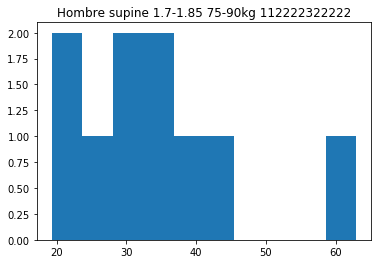

In [40]:
# Grupos interesantes en male supine
hombres_10_sup_med = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]=="75-90") &
            (perfiles_sqr["presiones"]=="112222322222")]
plt.hist(hombres_10_sup_med['sqr'], bins = 10)
plt.title("Hombre supine 1.7-1.85 75-90kg 112222322222")
plt.show()

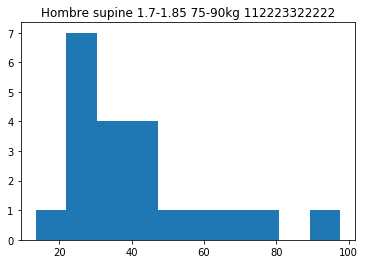

In [50]:
hombres_21 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]=="75-90") &
            (perfiles_sqr["presiones"]=="112223322222")]
plt.hist(hombres_21['sqr'], bins = 10)
plt.title("Hombre supine 1.7-1.85 75-90kg 112223322222")
plt.show()

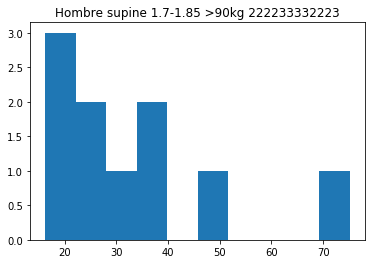

In [51]:
hombres_10_sup_alt = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]==">90") &
            (perfiles_sqr["presiones"]=="222233332223")]
plt.hist(hombres_10_sup_alt['sqr'], bins = 10)
plt.title("Hombre supine 1.7-1.85 >90kg 222233332223")
plt.show()

### Hombres lateral

In [27]:
summary_male_lateral = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Lateral")].\
    groupby(["altura_cat_hombre","peso_cat_hombre","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
summary_male_lateral=summary_male_lateral[summary_male_lateral['sqr']['size']>min_obs]
summary_male_lateral

sqr                      \
                                                     min      max       mean   
altura_cat_hombre peso_cat_hombre presiones                                    
1.7-1.85          75-90           002223321222  2.146500  86.4615  39.246447   
                  >90             223333432223  0.546476  64.6698  38.560488   

                                                                
                                                      std size  
altura_cat_hombre peso_cat_hombre presiones                     
1.7-1.85          75-90           002223321222  25.267366   16  
                  >90             223333432223  18.494756   10

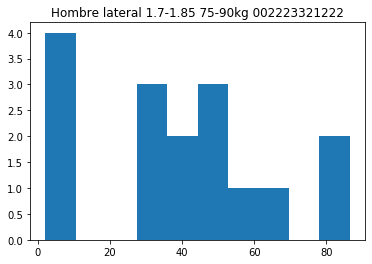

In [48]:
hombres16 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]=="75-90") &
            (perfiles_sqr["presiones"]=="002223321222")]

plt.hist(hombres16['sqr'], bins = 10)
plt.title("Hombre lateral 1.7-1.85 75-90kg 002223321222")
plt.show()

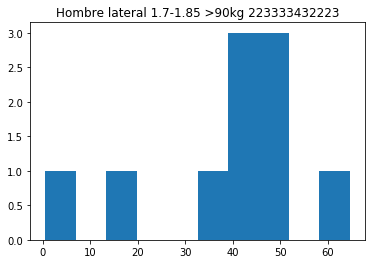

In [49]:
hombres10 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]==">90") &
            (perfiles_sqr["presiones"]=="223333432223")]
plt.hist(hombres10['sqr'], bins = 10)
plt.title("Hombre lateral 1.7-1.85 >90kg 223333432223")
plt.show()

### Mujeres supine

In [30]:
summary_female_supine = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Supine")].\
    groupby(["altura_cat_mujer","peso_cat_mujer","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
summary_female_supine=summary_female_supine[summary_female_supine['sqr']['size']>min_obs]
summary_female_supine

sqr                      \
                                                    min      max       mean   
altura_cat_mujer peso_cat_mujer presiones                                     
1.6-1.7          50-65          112222222222   0.323799  53.5324  33.062654   
                 65-80          112223222222  13.995000  65.7563  34.027090   

                                                              
                                                    std size  
altura_cat_mujer peso_cat_mujer presiones                     
1.6-1.7          50-65          112222222222  18.718768   11  
                 65-80          112223222222  16.806733   10

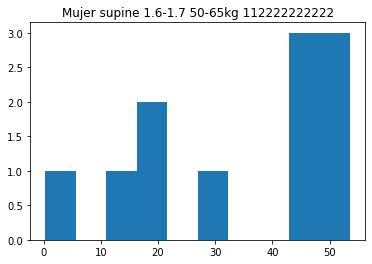

In [46]:
mujeres11 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="50-65") &
            (perfiles_sqr["presiones"]=="112222222222")]
plt.hist(mujeres11['sqr'], bins = 10)
plt.title("Mujer supine 1.6-1.7 50-65kg 112222222222")
plt.show()

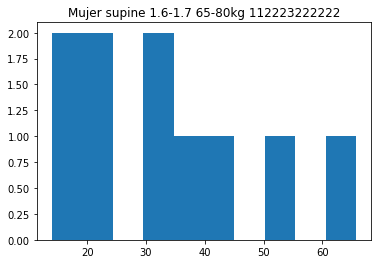

In [47]:
mujeres10 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="65-80") &
            (perfiles_sqr["presiones"]=="112223222222")]
plt.hist(mujeres10['sqr'], bins = 10)
plt.title("Mujer supine 1.6-1.7 65-80kg 112223222222")
plt.show()

### Mujeres lateral

In [33]:
summary_female_lateral = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral")].\
    groupby(["altura_cat_mujer","peso_cat_mujer","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
summary_female_lateral=summary_female_lateral[summary_female_lateral['sqr']['size']>min_obs]
summary_female_lateral

sqr                      \
                                                    min      max       mean   
altura_cat_mujer peso_cat_mujer presiones                                     
1.5-1.6          50-65          002222112222   5.260960  53.3149  28.749206   
1.6-1.7          50-65          001122211222   0.093528  63.1079  28.114961   
                 65-80          002233211222  11.195800  67.4817  33.063356   

                                                              
                                                    std size  
altura_cat_mujer peso_cat_mujer presiones                     
1.5-1.6          50-65          002222112222  15.133176   12  
1.6-1.7          50-65          001122211222  15.139790   20  
                 65-80          002233211222  16.162322   16

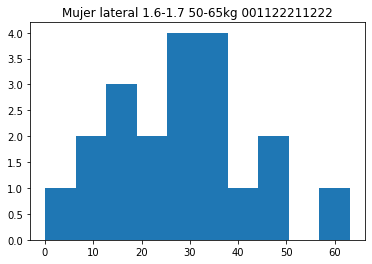

In [43]:
mujeres20 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="50-65") &
            (perfiles_sqr["presiones"]=="001122211222")]
plt.hist(mujeres20['sqr'], bins = 10)
plt.title("Mujer lateral 1.6-1.7 50-65kg 001122211222")
plt.show()

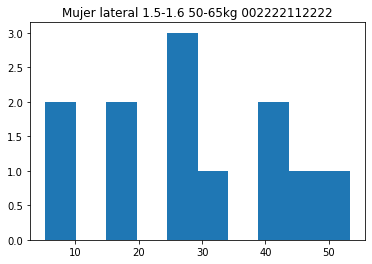

In [44]:
mujeres12 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_mujer"]=="1.5-1.6") & (perfiles_sqr["peso_cat_mujer"]=="50-65") &
            (perfiles_sqr["presiones"]=="002222112222")]
plt.hist(mujeres12['sqr'], bins = 10)
plt.title("Mujer lateral 1.5-1.6 50-65kg 002222112222")
plt.show()

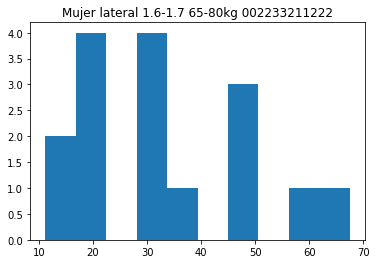

In [45]:
mujeres16 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="65-80") &
            (perfiles_sqr["presiones"]=="002233211222")]
plt.hist(mujeres16['sqr'], bins = 10)
plt.title("Mujer lateral 1.6-1.7 65-80kg 002233211222")
plt.show()